In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('DATA101_Combined_Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120506 entries, 0 to 120505
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  120506 non-null  int64  
 1   job_id                      120506 non-null  int64  
 2   title                       120506 non-null  object 
 3   company_name                120505 non-null  object 
 4   company_size                115885 non-null  float64
 5   min_salary                  28947 non-null   float64
 6   med_salary                  6134 non-null    float64
 7   max_salary                  28947 non-null   float64
 8   pay_period                  35081 non-null   object 
 9   formatted_work_type         120506 non-null  object 
 10  formatted_experience_level  94183 non-null   object 
 11  city                        120504 non-null  object 
 12  state                       120468 non-null  object 
 13  industry_name 

In [ ]:
df.drop(columns=['Unnamed: 0', 'company_size'], inplace=True)

In [ ]:
df.dropna(subset=['pay_period'], inplace=True)

In [ ]:
df['pay_period'].unique()

array(['HOURLY', 'YEARLY', 'MONTHLY', 'WEEKLY', 'BIWEEKLY'], dtype=object)

In [ ]:
df['med_salary'] = df['med_salary'].fillna((df['min_salary'] + df['max_salary']) / 2)

In [ ]:
df['med_salary'].hasnans

False

In [ ]:
df['formatted_work_type'].unique()

array(['Full-time', 'Internship', 'Contract', 'Part-time', 'Temporary',
       'Other', 'Volunteer'], dtype=object)

In [ ]:
(df['formatted_work_type'] == 'Other').sum()

np.int64(131)

In [ ]:
df.drop(df[df['formatted_work_type'] == 'Other'].index, inplace=True)

In [ ]:
df['formatted_work_type'].unique()

array(['Full-time', 'Internship', 'Contract', 'Part-time', 'Temporary',
       'Volunteer'], dtype=object)

In [ ]:
def get_yearly_multiplier(row):
    pay = row['pay_period']
    work = row['formatted_work_type']

    if pay == 'HOURLY':
        if work in ['Part-time', 'Internship', 'Temporary', 'Volunteer']:
            return 20 * 52  # assume ~20 hrs/week
        else:
            return 40 * 52  # full-time
    elif pay == 'WEEKLY':
        return 52
    elif pay == 'BIWEEKLY':
        return 26
    elif pay == 'MONTHLY':
        return 12
    elif pay == 'YEARLY':
        return 1
    else:
        return 1  # default fallback

# Apply the multiplier logic
df['multiplier'] = df.apply(get_yearly_multiplier, axis=1)

# Apply to salary columns
for col in ['min_salary', 'med_salary', 'max_salary']:
    df[col] = df[col] * df['multiplier']

df.drop(columns='multiplier', inplace=True)

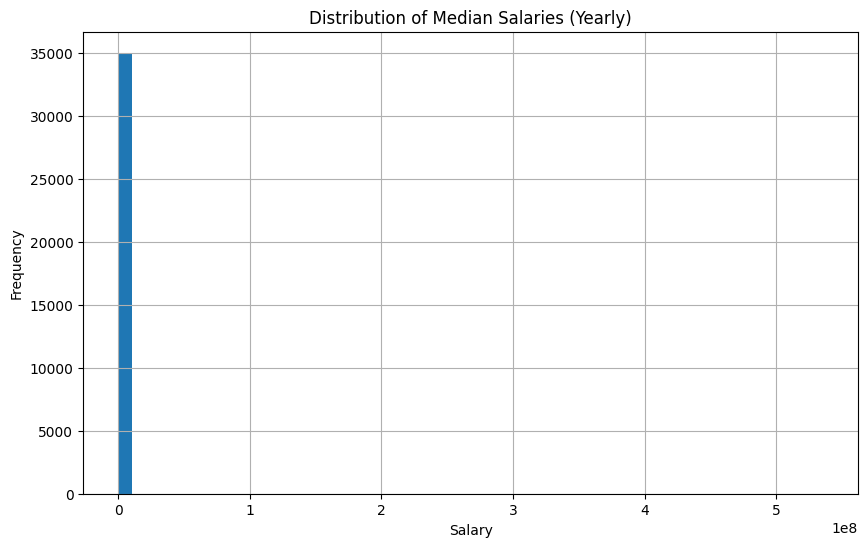

In [ ]:
plt.figure(figsize=(10, 6))
df['med_salary'].dropna().hist(bins=50)
plt.title('Distribution of Median Salaries (Yearly)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,job_id,title,company_name,min_salary,med_salary,max_salary,pay_period,formatted_work_type,formatted_experience_level,city,state,industry_name,skill_name
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,35360.0,38480.0,41600.0,HOURLY,Full-time,NaN,Jersey City,NJ,['Real Estate'],"['Marketing', 'Sales']"
1,10998357,Assitant Restaurant Manager,The National Exemplar,45000.0,55000.0,65000.0,YEARLY,Full-time,NaN,Mariemont,Ohio,['Restaurants'],"['Management', 'Manufacturing']"
2,23221523,Senior Elder Law / Trusts and Estates Associat...,"Abrams Fensterman, LLP",140000.0,157500.0,175000.0,YEARLY,Full-time,NaN,Lake Success,New York,['Law Practice'],['Other']
3,91700727,Economic Development and Planning Intern,Downtown Raleigh Alliance,14560.0,17680.0,20800.0,HOURLY,Internship,NaN,Raleigh,North Carolina,['Non-profit Organization Management'],['Project Management']
4,103254301,Producer,Raw Cereal,60000.0,180000.0,300000.0,YEARLY,Contract,NaN,Los Angeles,CA,['Design Services'],"['Design', 'Art/Creative', 'Information Techno..."


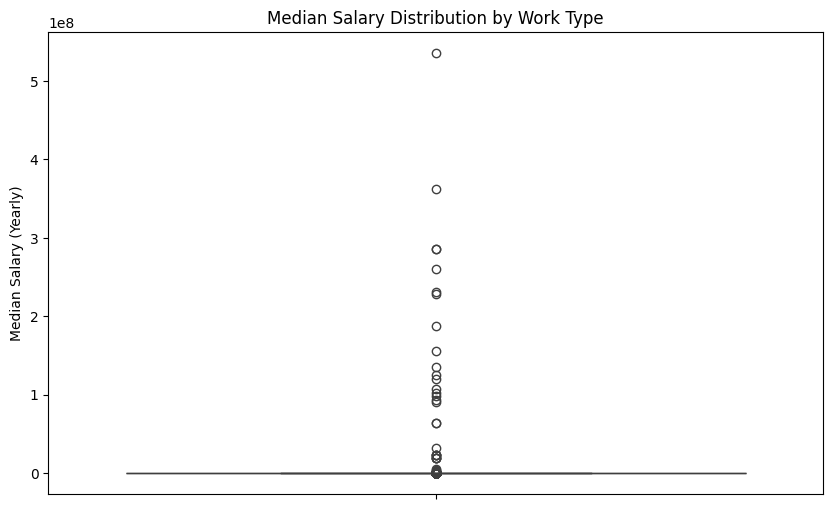

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='med_salary')
plt.title('Median Salary Distribution by Work Type')
plt.ylabel('Median Salary (Yearly)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    original_count = len(df)
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_count - len(df_filtered)
    print(f"Removed {removed} outliers from '{col}'")
    return df_filtered

# Apply to each salary column
for col in ['min_salary', 'med_salary', 'max_salary']:
    df = remove_outliers_iqr(df, col)

Removed 6782 outliers from 'min_salary'
Removed 265 outliers from 'med_salary'
Removed 231 outliers from 'max_salary'


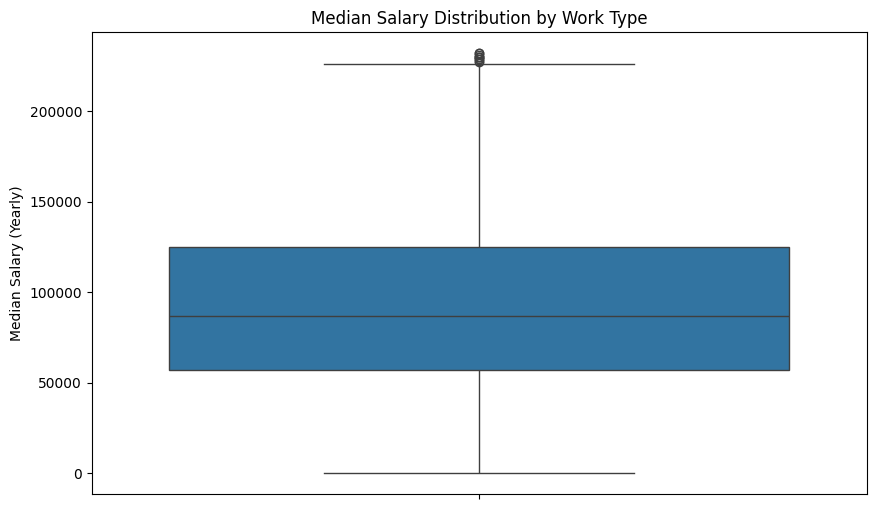

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='med_salary')
plt.title('Median Salary Distribution by Work Type')
plt.ylabel('Median Salary (Yearly)')
plt.xticks(rotation=45)
plt.show()

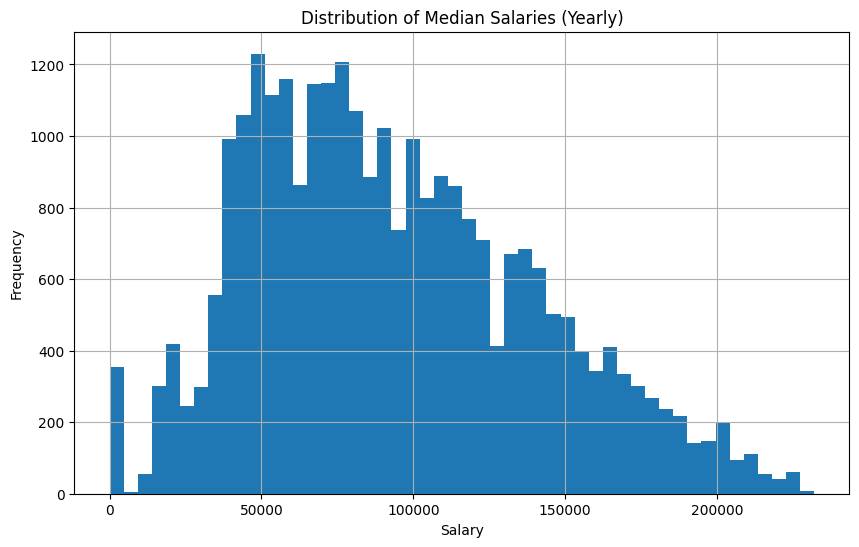

In [ ]:
plt.figure(figsize=(10, 6))
df['med_salary'].dropna().hist(bins=50)
plt.title('Distribution of Median Salaries (Yearly)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df.drop(columns=['pay_period'], inplace=True)

In [ ]:
df

,job_id,title,company_name,min_salary,med_salary,max_salary,formatted_work_type,formatted_experience_level,city,state,industry_name,skill_name
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,35360.0,38480.0,41600.0,Full-time,NaN,Jersey City,NJ,['Real Estate'],"['Marketing', 'Sales']"
1,10998357,Assitant Restaurant Manager,The National Exemplar,45000.0,55000.0,65000.0,Full-time,NaN,Mariemont,Ohio,['Restaurants'],"['Management', 'Manufacturing']"
2,23221523,Senior Elder Law / Trusts and Estates Associat...,"Abrams Fensterman, LLP",140000.0,157500.0,175000.0,Full-time,NaN,Lake Success,New York,['Law Practice'],['Other']
3,91700727,Economic Development and Planning Intern,Downtown Raleigh Alliance,14560.0,17680.0,20800.0,Internship,NaN,Raleigh,North Carolina,['Non-profit Organization Management'],['Project Management']
21,266566927,Marketing & Office Coordinator,Revesco Properties,55000.0,65000.0,75000.0,Full-time,NaN,Denver,CO,['Real Estate'],['Administrative']
...,...,...,...,...,...,...,...,...,...,...,...,...
120495,3906265414,Contract Administrator,"TalentBurst, an Inc 5000 company",72800.0,83200.0,93600.0,Contract,Mid-Senior level,Natick,MA,"['Medical Equipment Manufacturing', 'Pharmaceu...","['Legal', 'Finance', 'Writing/Editing']"
120496,3906266165,Catering Event Manager,Athena Recruiting,50000.0,57500.0,65000.0,Part-time,Associate,Indianapolis,Indiana,"['Hospitality', 'Caterers', 'Events Services']",['Administrative']
120500,3906266272,Quality Engineer,"TalentBurst, an Inc 5000 company",62400.0,83200.0,104000.0,Contract,Mid-Senior level,Natick,MA,"['Medical Equipment Manufacturing', 'Pharmaceu...",['Engineering']
120501,3906267117,Title IX/Investigations Attorney,Lozano Smith,120000.0,157500.0,195000.0,Full-time,Mid-Senior level,Fresno,California,['Law Practice'],"['Legal', 'Business Development']"


In [ ]:
df['state'].dropna(inplace=True)

In [ ]:
df['state'].unique()

array(['NJ', 'Ohio', 'New York', 'North Carolina', 'CO', 'Washington',
       'AK', 'TX', 'California', 'FL', 'KS', 'NY', 'TN', 'Indiana', 'CA',
       'Nebraska', 'Hawaii', 'Florida', '0', 'WA', 'MA', 'New Mexico',
       'Colorado', 'MT', 'Massachusetts', 'Pennsylvania', 'VA', 'Oregon',
       'IA', 'Illinois', 'Mississippi', 'Michigan', 'Hyogo', 'MD',
       'New Jersey', 'Georgia', 'New York ', 'NSW', 'Tennessee',
       'california', 'IL', 'OH', 'Texas', 'Maryland', 'Wisconsin', 'NC',
       'Nevada', 'Iowa', 'PA', 'WI', 'CALIFORNIA', 'Virginia', 'DC',
       'Uttar Pradesh', 'MN', 'WASHINGTON', 'Utah', 'IN', 'GA',
       'California ', 'Alabama', 'NV', 'England', 'Sweden', 'AZ',
       'Kansas', nan, 'Missouri', 'Geneva', 'OR', 'DE', 'Minnesota',
       'Ile de France', 'Connecticut', 'globally', 'MI', 'HI', 'London',
       'France', 'County / Dublin postal district', 'Arizona', 'ny',
       'Louisiana ', 'BC', 'Greater London', 'Ca', 'Fl', 'Italy',
       'LA - Louisiana', 'new

In [ ]:
state_map = {
    'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR',
    'california': 'CA', 'ca': 'CA', 'ca ': 'CA', 'ca california': 'CA',
    'colorado': 'CO', 'co': 'CO', 'co - colorado': 'CO', 'co.': 'CO',
    'connecticut': 'CT', 'delaware': 'DE', 'district of columbia': 'DC', 'd.c.': 'DC', 'dc': 'DC',
    'florida': 'FL', 'fl': 'FL', 'florida ': 'FL', 'fl ': 'FL',
    'georgia': 'GA', 'ga': 'GA', 'ga.': 'GA', 'ga ': 'GA',
    'hawaii': 'HI', 'idaho': 'ID', 'illinois': 'IL', 'il': 'IL', 'il ': 'IL',
    'indiana': 'IN', 'in': 'IN', 'iowa': 'IA',
    'kansas': 'KS', 'kentucky': 'KY', 'ky': 'KY', 'ky ': 'KY',
    'louisiana': 'LA', 'la': 'LA', 'la - louisiana': 'LA',
    'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'ma': 'MA',
    'michigan': 'MI', 'minnesota': 'MN', 'mn': 'MN', 'mn ': 'MN',
    'mississippi': 'MS', 'missouri': 'MO', 'mo': 'MO', 'mo ': 'MO',
    'montana': 'MT', 'nebraska': 'NE', 'ne': 'NE', 'ne ': 'NE',
    'nevada': 'NV', 'new hampshire': 'NH', 'new jersey': 'NJ', 'nj': 'NJ', 'new jersey ': 'NJ',
    'new mexico': 'NM', 'new york': 'NY', 'ny': 'NY', 'ny ': 'NY', 'new york ': 'NY', 'new york, ny': 'NY',
    'north carolina': 'NC', 'nc': 'NC', 'north dakota': 'ND',
    'ohio': 'OH', 'oh': 'OH',
    'oklahoma': 'OK', 'oregon': 'OR', 'or': 'OR', 'or - oregon': 'OR',
    'pennsylvania': 'PA', 'pa': 'PA', 'pa ': 'PA',
    'rhode island': 'RI', 'south carolina': 'SC', 'sc': 'SC',
    'south dakota': 'SD', 'tennessee': 'TN', 'tn': 'TN', 'texas': 'TX', 'tx': 'TX',
    'utah': 'UT', 'ut': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'va': 'VA',
    'washington': 'WA', 'wa': 'WA', 'wa ': 'WA', 'washington (wa)': 'WA', 'washington dc': 'DC',
    'west virginia': 'WV', 'wisconsin': 'WI', 'wi': 'WI', 'wi ': 'WI', 'wyoming': 'WY',
}

# Normalize, map, and clean
df['state_cleaned'] = df['state'].astype(str).str.strip().str.lower().map(state_map)

# Drop rows where mapping failed (non-US states or unknowns)
df = df[df['state_cleaned'].notna()]

# Replace original column if needed
df['state'] = df['state_cleaned']
df.drop(columns='state_cleaned', inplace=True)

<ipython-input-59-baf2615c4bbd>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['state_cleaned']
<ipython-input-59-baf2615c4bbd>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='state_cleaned', inplace=True)


In [ ]:
df['state'].unique()

array(['NJ', 'OH', 'NY', 'NC', 'CO', 'WA', 'TX', 'CA', 'FL', 'TN', 'IN',
       'NE', 'HI', 'MA', 'NM', 'PA', 'VA', 'OR', 'IL', 'MS', 'MI', 'GA',
       'MD', 'WI', 'NV', 'IA', 'DC', 'MN', 'UT', 'AL', 'KS', 'MO', 'CT',
       'AZ', 'LA', 'AK', 'ID', 'OK', 'ME', 'SC', 'KY', 'WY', 'ND', 'AR',
       'SD', 'NH', 'DE', 'MT', 'RI', 'VT', 'WV'], dtype=object)

In [ ]:
df = df[df['state'] != 'dc']

In [ ]:
df

,job_id,title,company_name,min_salary,med_salary,max_salary,formatted_work_type,formatted_experience_level,city,state,industry_name,skill_name
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,35360.0,38480.0,41600.0,Full-time,NaN,Jersey City,NJ,['Real Estate'],"['Marketing', 'Sales']"
1,10998357,Assitant Restaurant Manager,The National Exemplar,45000.0,55000.0,65000.0,Full-time,NaN,Mariemont,OH,['Restaurants'],"['Management', 'Manufacturing']"
2,23221523,Senior Elder Law / Trusts and Estates Associat...,"Abrams Fensterman, LLP",140000.0,157500.0,175000.0,Full-time,NaN,Lake Success,NY,['Law Practice'],['Other']
3,91700727,Economic Development and Planning Intern,Downtown Raleigh Alliance,14560.0,17680.0,20800.0,Internship,NaN,Raleigh,NC,['Non-profit Organization Management'],['Project Management']
21,266566927,Marketing & Office Coordinator,Revesco Properties,55000.0,65000.0,75000.0,Full-time,NaN,Denver,CO,['Real Estate'],['Administrative']
...,...,...,...,...,...,...,...,...,...,...,...,...
120495,3906265414,Contract Administrator,"TalentBurst, an Inc 5000 company",72800.0,83200.0,93600.0,Contract,Mid-Senior level,Natick,MA,"['Medical Equipment Manufacturing', 'Pharmaceu...","['Legal', 'Finance', 'Writing/Editing']"
120496,3906266165,Catering Event Manager,Athena Recruiting,50000.0,57500.0,65000.0,Part-time,Associate,Indianapolis,IN,"['Hospitality', 'Caterers', 'Events Services']",['Administrative']
120500,3906266272,Quality Engineer,"TalentBurst, an Inc 5000 company",62400.0,83200.0,104000.0,Contract,Mid-Senior level,Natick,MA,"['Medical Equipment Manufacturing', 'Pharmaceu...",['Engineering']
120501,3906267117,Title IX/Investigations Attorney,Lozano Smith,120000.0,157500.0,195000.0,Full-time,Mid-Senior level,Fresno,CA,['Law Practice'],"['Legal', 'Business Development']"


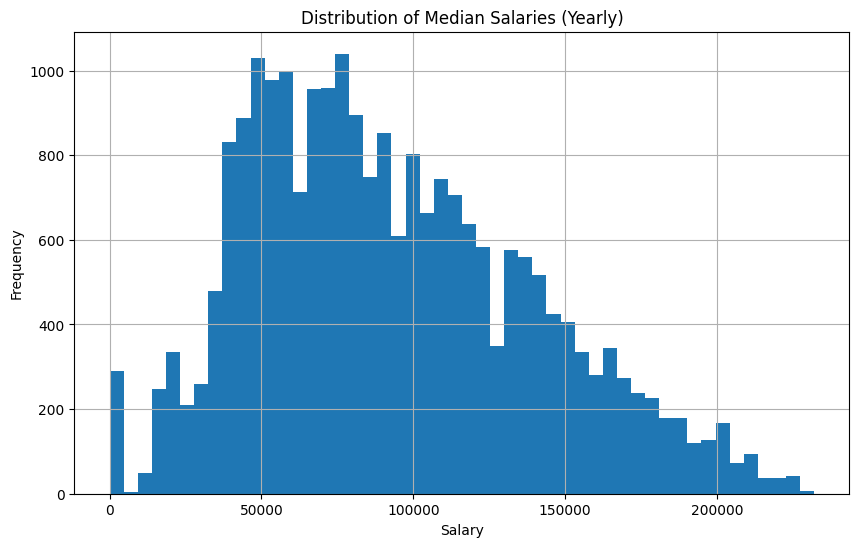

In [ ]:
plt.figure(figsize=(10, 6))
df['med_salary'].dropna().hist(bins=50)
plt.title('Distribution of Median Salaries (Yearly)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df.to_csv('DATA101_Combined_Dataset_Cleaned.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23104 entries, 0 to 120505
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      23104 non-null  int64  
 1   title                       23104 non-null  object 
 2   company_name                23104 non-null  object 
 3   min_salary                  23104 non-null  float64
 4   med_salary                  23104 non-null  float64
 5   max_salary                  23104 non-null  float64
 6   formatted_work_type         23104 non-null  object 
 7   formatted_experience_level  18244 non-null  object 
 8   city                        23104 non-null  object 
 9   state                       23104 non-null  object 
 10  industry_name               23104 non-null  object 
 11  skill_name                  23104 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.3+ MB


In [ ]:
df = pd.read_csv('DATA101_Combined_Dataset_Cleaned.csv')

In [ ]:
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

# Add full state name column to your DataFrame
df['state_name'] = df['state'].map(state_abbrev_to_name)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23104 entries, 0 to 23103
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  23104 non-null  int64  
 1   job_id                      23104 non-null  int64  
 2   title                       23104 non-null  object 
 3   company_name                23104 non-null  object 
 4   min_salary                  23104 non-null  float64
 5   med_salary                  23104 non-null  float64
 6   max_salary                  23104 non-null  float64
 7   formatted_work_type         23104 non-null  object 
 8   formatted_experience_level  18244 non-null  object 
 9   city                        23104 non-null  object 
 10  state                       23104 non-null  object 
 11  industry_name               23104 non-null  object 
 12  skill_name                  23104 non-null  object 
 13  state_name                  231

In [ ]:
df.to_csv('DATA101_Combined_Dataset_Cleaned.csv')